In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import time

In [2]:
"""#Load MedMinst Dataset
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset (replace with your path)
data = np.load("C:/Users/39351/Downloads/retinamnist_128.npz")
num_classes = 5
# List available keys
print("Available keys:", list(data.keys()))
# Step 2: Access data
# Extract train/val/test splits
x_train, y_train = data['train_images'], data['train_labels']
x_val, y_val     = data['val_images'], data['val_labels']
x_test, y_test   = data['test_images'], data['test_labels']

# Normalize images
x_train = x_train.astype("float32") / 255.0
x_val   = x_val.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# If labels are (N, 1), squeeze to (N,)
y_train = np.squeeze(y_train)
y_val   = np.squeeze(y_val)
y_test  = np.squeeze(y_test)

# Number of classes
num_classes = len(np.unique(y_train))

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val   = tf.keras.utils.to_categorical(y_val, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

print("✅ Data loaded and preprocessed.")
print("Train:", x_train.shape, y_train.shape)
print("Val:  ", x_val.shape, y_val.shape)
print("Test: ", x_test.shape, y_test.shape)


'''# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)'''

# Function to resize images one at a time to save memory
def resize_image(img, label):
    img = tf.image.resize(img, [128, 128])  # Resize single image
    return img, label

# Use tf.data to process images in a memory-efficient way
batch_size = 16#64  # Adjust batch size based on available memory

train_data = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Prefetch to improve efficiency
)

val_data = (
    tf.data.Dataset.from_tensor_slices((x_val, y_val))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Check dataset structure
for img, label in train_data.take(1):
    print("Resized batch shape:", img.shape, label.shape)"""


'#Load MedMinst Dataset\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\n# Step 1: Load the dataset (replace with your path)\ndata = np.load("C:/Users/39351/Downloads/retinamnist_128.npz")\nnum_classes = 5\n# List available keys\nprint("Available keys:", list(data.keys()))\n# Step 2: Access data\n# Extract train/val/test splits\nx_train, y_train = data[\'train_images\'], data[\'train_labels\']\nx_val, y_val     = data[\'val_images\'], data[\'val_labels\']\nx_test, y_test   = data[\'test_images\'], data[\'test_labels\']\n\n# Normalize images\nx_train = x_train.astype("float32") / 255.0\nx_val   = x_val.astype("float32") / 255.0\nx_test  = x_test.astype("float32") / 255.0\n\n# If labels are (N, 1), squeeze to (N,)\ny_train = np.squeeze(y_train)\ny_val   = np.squeeze(y_val)\ny_test  = np.squeeze(y_test)\n\n# Number of classes\nnum_classes = len(np.unique(y_train))\n\n# One-hot encode labels\ny_train = tf.keras.utils.to_categorical(y_train, num_classes)\ny_val  

In [3]:

"""# Load CIFAR-100 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
num_classes = 100


# Normalize pixel values
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Function to resize images one at a time to save memory
def resize_image(img, label):
    img = tf.image.resize(img, [64, 64])  # Resize single image
    return img, label

# Use tf.data to process images in a memory-efficient way
batch_size = 64#64  # Adjust batch size based on available memory

train_data = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Prefetch to improve efficiency
)

val_data = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Check dataset structure
for img, label in train_data.take(1):
    print("Resized batch shape:", img.shape, label.shape)

# Sanity check
for images, labels in train_data.take(1):
    print("✅ Image batch shape:", images.shape)
    print("✅ One-hot label batch shape:", labels.shape)"""


'# Load CIFAR-100 Dataset\n(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()\nnum_classes = 100\n\n\n# Normalize pixel values\nx_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0\n\n# Convert labels to one-hot encoding\ny_train = keras.utils.to_categorical(y_train, num_classes)\ny_test = keras.utils.to_categorical(y_test, num_classes)\n\n# Function to resize images one at a time to save memory\ndef resize_image(img, label):\n    img = tf.image.resize(img, [64, 64])  # Resize single image\n    return img, label\n\n# Use tf.data to process images in a memory-efficient way\nbatch_size = 64#64  # Adjust batch size based on available memory\n\ntrain_data = (\n    tf.data.Dataset.from_tensor_slices((x_train, y_train))\n    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(tf.data.AUTOTUNE)  # Prefetch to improve efficiency\n)\n\nval_data = (\n    tf.data.Dataset.from_tensor_slices((x_test,

In [4]:
'''# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
num_classes = 10

# Expand dimensions to (batch, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28) -> (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)

# Resize images to (32, 32, 1)
x_train = tf.image.resize(x_train, [32, 32])
x_test  = tf.image.resize(x_test, [32, 32])

# Convert grayscale (1 channel) to RGB (3 channels)
x_train = tf.image.grayscale_to_rgb(x_train)  # (60000, 32, 32, 1) -> (60000, 32, 32, 3)
x_test  = tf.image.grayscale_to_rgb(x_test)

# Normalize AFTER resizing (for efficiency)
x_train = x_train * 0.0039215686  # Equivalent to / 255.0
x_test  = x_test * 0.0039215686  # Equivalent to / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

print("Train:", x_train.shape, y_train.shape)  # Expected: (60000, 32, 32, 3)
print("Test: ", x_test.shape, y_test.shape)    # Expected: (10000, 32, 32, 3)

# Function to resize images one at a time to save memory
def resize_image(img, label):
    img = tf.image.resize(img, [128, 128])  # Resize single image
    return img, label

# Use tf.data to process images in a memory-efficient way
batch_size = 16#64  # Adjust batch size based on available memory

train_data = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)  # Prefetch to improve efficiency
)

val_data = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(resize_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Check dataset structure
for img, label in train_data.take(1):
    print("Resized batch shape:", img.shape, label.shape)'''

'# Load MNIST dataset\n(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()\n#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()\nnum_classes = 10\n\n# Expand dimensions to (batch, height, width, channels)\nx_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28) -> (60000, 28, 28, 1)\nx_test  = np.expand_dims(x_test, axis=-1)\n\n# Resize images to (32, 32, 1)\nx_train = tf.image.resize(x_train, [32, 32])\nx_test  = tf.image.resize(x_test, [32, 32])\n\n# Convert grayscale (1 channel) to RGB (3 channels)\nx_train = tf.image.grayscale_to_rgb(x_train)  # (60000, 32, 32, 1) -> (60000, 32, 32, 3)\nx_test  = tf.image.grayscale_to_rgb(x_test)\n\n# Normalize AFTER resizing (for efficiency)\nx_train = x_train * 0.0039215686  # Equivalent to / 255.0\nx_test  = x_test * 0.0039215686  # Equivalent to / 255.0\n\n# Convert labels to one-hot encoding\ny_train = keras.utils.to_categorical(y_train, num_classes)\ny_test  = keras.utils.to_categorical(y

In [5]:
import tensorflow as tf


num_classes = 10# <- manually define number of classes

# Set constants
#data_dir = "D:/University Reasreaches/Covid-19/keras-covid-19/dataset_Wang"
#data_dir = "C:/Users/39351/Downloads/imagenet-r/imagenet-r"
#data_dir = "C:/Users/39351/Downloads/Tiny-ImageNet-C/Tiny-ImageNet-C"
#data_dir = "C:/Users/39351/Downloads/PACS/pacs_data/pacs_data" # num_classes/Domains = 4
#data_dir = "C:/Users/39351/Downloads/The Oxford-IIIT Pet Dataset/images/images" #Nope
#data_dir = "C:/Users/39351/Downloads/dtd-r1.0.1/dtd/images" # num_classes = 47
#data_dir = "C:/Users/39351/Downloads/EuroSAT_RGB" # num_classes = 10
#data_dir = "D:/indoorCVPR_09/Images"
#train_dir = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/train"
#val_dir   = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/val"
train_dir =  "C:/Users/39351/Downloads/imagenette2-160/train"
val_dir   = "C:/Users/39351/Downloads/imagenette2-160/val"

#train_dir =  "C:/Users/39351/Downloads/imagewoof2-160/train"
#val_dir   = "C:/Users/39351/Downloads/imagewoof2-160/val"

#train_dir = "C:/Users/39351/Downloads/flowers_split/train" #Nope
#val_dir = "C:/Users/39351/Downloads/flowers_split/val"
#test_dir = "C:/Users/39351/Downloads/flowers_split/test"

#train_dir = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/train/train"
#val_dir   = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/validation/validation"

batch_size = 32
img_size = (96, 96)
validation_split = 0.2
seed = 42


# Load training and validation datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)


'''# Load training and validation datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)'''


# Normalization and one-hot encoding
normalization_layer = tf.keras.layers.Rescaling(1./255)


train_data = (
    train_data
    .map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth=num_classes)))
    .prefetch(tf.data.AUTOTUNE)
)

val_data = (
    val_data
    .map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth=num_classes)))
    .prefetch(tf.data.AUTOTUNE)
)

# Remove normalization_layer
# normalization_layer = tf.keras.layers.Rescaling(1./255)

'''# Update the mapping functions to skip normalization
train_data = (
    train_data
    .map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
    .prefetch(tf.data.AUTOTUNE)
)

val_data = (
    val_data
    .map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
    .prefetch(tf.data.AUTOTUNE)
)'''


# Sanity check
for images, labels in train_data.take(1):
    print("✅ Image batch shape:", images.shape)
    print("✅ One-hot label batch shape:", labels.shape)



Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
✅ Image batch shape: (32, 96, 96, 3)
✅ One-hot label batch shape: (32, 10)


In [6]:
"""import tensorflow as tf

num_classes = 10# <- manually define number of classes

# Set constants
data_dir = "D:/University Reasreaches/Covid-19/keras-covid-19/dataset_Wang"
#data_dir = "C:/Users/39351/Downloads/imagenet-r/imagenet-r"
#data_dir = "C:/Users/39351/Downloads/Tiny-ImageNet-C/Tiny-ImageNet-C"
#data_dir = "C:/Users/39351/Downloads/PACS/pacs_data/pacs_data"
#data_dir = "C:/Users/39351/Downloads/The Oxford-IIIT Pet Dataset/images/images" #OOOOKKKKi
#data_dir = "D:/indoorCVPR_09/Images"
#train_dir = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/train"
#val_dir   = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/val"

#train_dir = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/train/train"
#val_dir   = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/validation/validation"

batch_size = 8
img_size = (224, 224)
validation_split = 0.5
seed = 42

# Load dataset as before
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

# Label smoothing function
def smooth_labels(y, factor=0.5):
    # y is assumed to be integer labels, not one-hot yet
    y = tf.one_hot(y, depth=num_classes)
    y = (1 - factor) * y + factor / num_classes
    return y

# Normalization and Label Smoothing
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = (
    train_data
    .map(lambda x, y: (normalization_layer(x), smooth_labels(y, factor=0.1)))
    .prefetch(tf.data.AUTOTUNE)
)

val_data = (
    val_data
    .map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth=num_classes)))
    .prefetch(tf.data.AUTOTUNE)
)"""


'import tensorflow as tf\n\nnum_classes = 10# <- manually define number of classes\n\n# Set constants\ndata_dir = "D:/University Reasreaches/Covid-19/keras-covid-19/dataset_Wang"\n#data_dir = "C:/Users/39351/Downloads/imagenet-r/imagenet-r"\n#data_dir = "C:/Users/39351/Downloads/Tiny-ImageNet-C/Tiny-ImageNet-C"\n#data_dir = "C:/Users/39351/Downloads/PACS/pacs_data/pacs_data"\n#data_dir = "C:/Users/39351/Downloads/The Oxford-IIIT Pet Dataset/images/images" #OOOOKKKKi\n#data_dir = "D:/indoorCVPR_09/Images"\n#train_dir = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/train"\n#val_dir   = "C:/Users/39351/Downloads/tiny-imagenet-200/tiny-imagenet-200/val"\n\n#train_dir = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/train/train"\n#val_dir   = "C:/Users/39351/Downloads/Eye Disease Detection Dataset/validation/validation"\n\nbatch_size = 8\nimg_size = (224, 224)\nvalidation_split = 0.5\nseed = 42\n\n# Load dataset as before\ntrain_data = tf.keras.preprocessing.image_d

In [7]:
train_dataset = train_data
test_dataset = val_data

In [8]:
import matplotlib.pyplot as plt


def plot_model_performance(plastic_train_loss, plastic_val_acc, plastic_noise_epochs,
                           baseline_train_loss, baseline_val_acc):

    epochs = list(range(1, len(plastic_train_loss) + 1))

    # --- Plot for Plastic Model ---
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot curves
    train_loss_line, = ax1.plot(epochs, plastic_train_loss, 'b-', label='Train Loss')
    val_acc_line, = ax2.plot(epochs, plastic_val_acc, 'g-', label='Val Accuracy')

    # Plot noise injection points as empty red circles
    for epoch in plastic_noise_epochs:
        idx = epoch
        ax1.plot(epoch + 1, plastic_train_loss[idx], marker='o', markersize=8,
                 markeredgecolor='red', markerfacecolor='none', linestyle='None',
                 label='Noise Injection' if epoch == plastic_noise_epochs[0] else "")
        ax2.plot(epoch + 1, plastic_val_acc[idx], marker='o', markersize=8,
                 markeredgecolor='red', markerfacecolor='none', linestyle='None')

    # Labels and legend
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Train Loss", color='b')
    ax2.set_ylabel("Validation Accuracy", color='g')
    ax1.set_title("SAL Model: Training Loss & Validation Accuracy")

    # Combine legends
    lines = [train_loss_line, val_acc_line]
    labels = [line.get_label() for line in lines]
    if plastic_noise_epochs:
        lines.append(ax1.plot([], [], marker='o', markersize=8,
                              markeredgecolor='red', markerfacecolor='none', linestyle='None', label='Noise Injection')[0])
        labels.append("Noise Injection")
    ax1.legend(lines, labels, loc='center right')

    # Remove background grid
    ax1.grid(False)
    ax2.grid(False)

    fig.tight_layout()
    plt.show()

    # --- Plot for Baseline Model ---
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.plot(epochs, baseline_train_loss, 'b-', label='Train Loss')
    ax2.plot(epochs, baseline_val_acc, 'g-', label='Val Accuracy')

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Train Loss", color='b')
    ax2.set_ylabel("Validation Accuracy", color='g')
    ax1.set_title("Baseline Model: Training Loss & Validation Accuracy")

    ax1.legend(loc='center right')
    ax1.grid(False)
    ax2.grid(False)

    fig.tight_layout()
    plt.show()

In [9]:
def compute_sharpness(model, loss_fn, dataset, sample_batches=2):
    """
    Estimate local sharpness as average gradient norm across sample batches.
    """
    total_norm = 0.0
    num_batches = 0

    for batch_idx, (x_batch, y_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            preds = model(x_batch, training=False)
            loss = loss_fn(y_batch, preds)

        grads = tape.gradient(loss, model.trainable_variables)
        batch_norm = tf.reduce_sum([tf.norm(g)**2 for g in grads if g is not None])
        total_norm += tf.sqrt(batch_norm)
        num_batches += 1

        if batch_idx + 1 >= sample_batches:
            break

    return total_norm.numpy() / num_batches


In [10]:
from tensorflow.keras import layers
class Velu(layers.Layer):
    def __init__(self, alpha=0.1, beta1=0.1, beta2=0.1, gamma=0.1, momentum=0.9, lambda_ot=0.1, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.gamma = gamma
        self.momentum = momentum
        self.lambda_ot = lambda_ot
        self.lambda_ = self.add_weight(name="lambda_", shape=(), initializer="ones", trainable=True)

    def wasserstein_distance(self, x):
        """
        Computes the Wasserstein distance between the activation output and the target Gaussian distribution.
        """
        target_mean = 0.0
        target_std = 1.0
        x_mean = tf.reduce_mean(x)
        x_std = tf.math.reduce_std(x)
        
        w_dist = tf.square(x_mean - target_mean) + tf.square(x_std - target_std)
        return w_dist

    def call(self, x):
        # Compute standard deviation for adaptive scaling
        variance = tf.reduce_mean(tf.square(x), axis=-1, keepdims=True)
        std_dev = tf.math.rsqrt(variance + 1e-6)
        #std_dev = tf.math.rsqrt(variance + 1e-3)

        adapt_factor = 1.0 + self.gamma * tf.math.tanh(std_dev * self.momentum)

        # Combine arc-tan and arc-sin transformations
        clipped = tf.clip_by_value(self.beta2 * x, -1.0, 1.0)
        mix = tf.math.atan(self.beta1 * x) + tf.math.asin(clipped)

        # Compute the activation output
        activation = x * tf.keras.activations.sigmoid(self.alpha * mix) * adapt_factor
        #activation = x * tf.keras.activations.sigmoid(self.alpha * mix) * tf.clip_by_value(adapt_factor, 0.01, 0.1)

        # Compute Wasserstein regularization
        w_dist = self.wasserstein_distance(activation)
        reg_loss = self.lambda_ot * w_dist

        # Add Wasserstein loss to the total loss function
        self.add_loss(reg_loss)

        return self.lambda_ * activation

    def get_config(self):
        config = super().get_config()
        config.update({
            "alpha": self.alpha,
            "beta1": self.beta1,
            "beta2": self.beta2,
            "gamma": self.gamma,
            "momentum": self.momentum,
            "lambda_ot": self.lambda_ot,
        })
        return config

def velu(alpha=0.1, beta1=0.1, beta2=0.1, gamma=0.1, momentum=0.9, lambda_ot=0.1):
#def velu(alpha=2.0, beta1=1.0, beta2=0.7, gamma=0.1, momentum=0.9, lambda_ot=0.1):
    return Velu(alpha, beta1, beta2, gamma, momentum, lambda_ot)


=== Training Baseline Model (Adam Only) ===
Baseline - Epoch 1: Train Loss = 1.9412, Test Loss = 1.0034, Test Acc = 0.7474
Baseline - Epoch 2: Train Loss = 0.9194, Test Loss = 0.5018, Test Acc = 0.8719
Baseline - Epoch 3: Train Loss = 0.5277, Test Loss = 0.3326, Test Acc = 0.9066
Baseline - Epoch 4: Train Loss = 0.3680, Test Loss = 0.2682, Test Acc = 0.9217
Baseline - Epoch 5: Train Loss = 0.2769, Test Loss = 0.2359, Test Acc = 0.9296
Baseline - Epoch 6: Train Loss = 0.2202, Test Loss = 0.2146, Test Acc = 0.9356
Baseline - Epoch 7: Train Loss = 0.1594, Test Loss = 0.2063, Test Acc = 0.9371
Baseline - Epoch 8: Train Loss = 0.1246, Test Loss = 0.2040, Test Acc = 0.9395
Baseline - Epoch 9: Train Loss = 0.0939, Test Loss = 0.2006, Test Acc = 0.9424
Baseline - Epoch 10: Train Loss = 0.0766, Test Loss = 0.1960, Test Acc = 0.9449
Baseline - Epoch 11: Train Loss = 0.0627, Test Loss = 0.1982, Test Acc = 0.9461
Baseline - Epoch 12: Train Loss = 0.0467, Test Loss = 0.1995, Test Acc = 0.9483
Basel

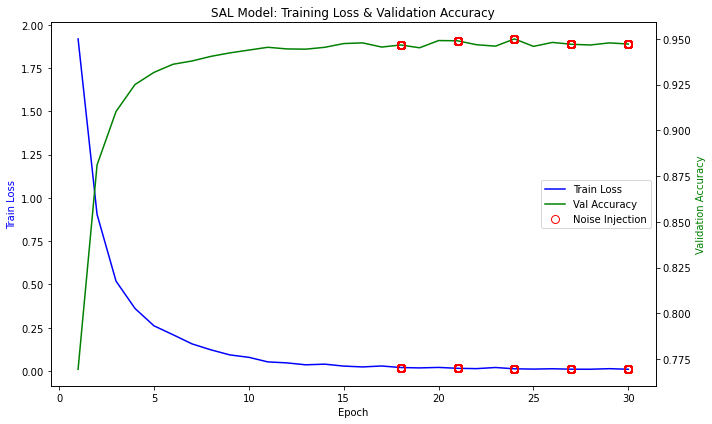

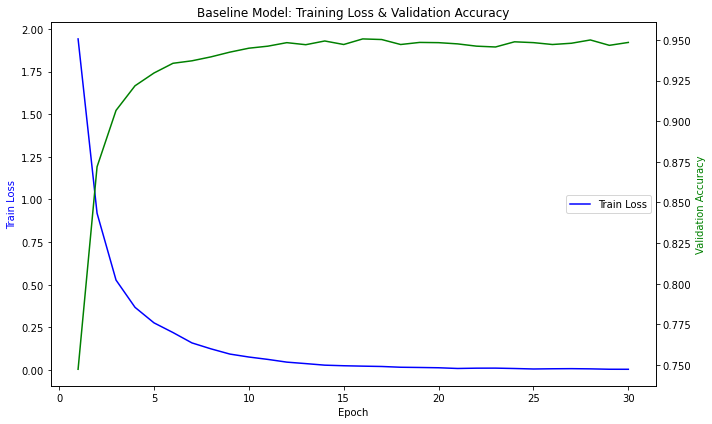

In [11]:
# Optional: Enable mixed precision if using a compatible GPU
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

import tensorflow as tf
import psutil
import os
from tensorflow.keras import backend as K


# 1. Define memory function
def get_model_memory_usage():
    process = psutil.Process(os.getpid())
    memory_used_bytes = process.memory_info().rss
    memory_used_gb = memory_used_bytes / (1024 ** 2)
    return memory_used_gb


plastic_train_loss, plastic_val_acc, plastic_noise_epochs = [], [], []
baseline_train_loss, baseline_val_acc = [], []
plastic_stress_values = []
plastic_deformation_epochs = []
plastic_sharpness = []
trajectory_sal = []
baseline_trajectory = []


optimizer_plastic = keras.optimizers.Adam(learning_rate=1e-5)
optimizer_baseline = keras.optimizers.Adam(learning_rate=1e-5)


eph = 30
#velu_activation = velu()
# Define a lightweight model – here we use MobileNetV2 for speed

def create_model():
    base_model = keras.applications.DenseNet201(
        include_top=False,
        weights='imagenet',
        input_shape=(96, 96, 3)
    )
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = keras.layers.Dense(512, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
    model = keras.models.Model(inputs=base_model.input, outputs=outputs)
    return model

# Define the loss function
loss_fn = keras.losses.CategoricalCrossentropy()

print("=== Training Baseline Model (Adam Only) ===")
baseline_model = create_model()

@tf.function
def baseline_train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        preds = baseline_model(x_batch, training=True)
        loss = loss_fn(y_batch, preds)
    grads = tape.gradient(loss, baseline_model.trainable_variables)
    optimizer_baseline.apply_gradients(zip(grads, baseline_model.trainable_variables))
    return loss

def evaluate_model(model, dataset):
    total_loss = 0.0
    total_acc = 0.0
    batches = 0
    for x_batch, y_batch in dataset:
        preds = model(x_batch, training=False)
        loss = loss_fn(y_batch, preds).numpy()
        total_loss += loss
        total_acc += np.mean(np.argmax(preds.numpy(), axis=1) == np.argmax(y_batch.numpy(), axis=1))
        batches += 1
    return total_loss / batches, total_acc / batches


baseline_epochs = eph
baseline_start_time = time.time()
for epoch in range(baseline_epochs):
    epoch_loss = 0.0
    batches = 0
    for x_batch, y_batch in train_dataset:
        loss = baseline_train_step(x_batch, y_batch)
        epoch_loss += loss.numpy()
        batches += 1
    avg_loss = epoch_loss / batches
    test_loss, test_acc = evaluate_model(baseline_model, test_dataset)
    baseline_train_loss.append(avg_loss)
    baseline_val_acc.append(test_acc)
    print(f"Baseline - Epoch {epoch+1}: Train Loss = {avg_loss:.4f}, Test Loss = {test_loss:.4f}, Test Acc = {test_acc:.4f}")

    param1_base = tf.reduce_mean(baseline_model.trainable_variables[0]).numpy()
    param2_base = tf.reduce_mean(baseline_model.trainable_variables[1]).numpy()
    baseline_trajectory.append((param1_base, param2_base, avg_loss))
    #weights_flat_base = np.concatenate([tf.reshape(var, [-1]).numpy() for var in baseline_model.trainable_variables])
    #proj1_base = np.dot(weights_flat_base, direction1)
    #proj2_base = np.dot(weights_flat_base, direction2)
    #baseline_trajectory.append((proj1_base, proj2_base, avg_loss))

baseline_total_time = time.time() - baseline_start_time
baseline_memory_used_gb = get_model_memory_usage()
#baseline_test_loss, baseline_test_acc = evaluate_model(baseline_model, test_dataset)


print("\n=== Training Plastic Deformation Model (Adam + Noise) ===")
plastic_model = create_model()

# ====== #
'''# Create Random Projection Directions
all_params = np.concatenate([tf.reshape(var, [-1]).numpy() for var in plastic_model.trainable_variables])
dim = all_params.shape[0]

direction1 = np.random.randn(dim)
direction2 = np.random.randn(dim)

direction1 /= np.linalg.norm(direction1)
direction2 /= np.linalg.norm(direction2)'''
# ================== #

Delta = 1e-7
lam = 1e-5
theta = 0.005
S_yield = 0.01
S_noise = 0.5 * S_yield#0.007
rho = 0.0005
epsilon_loss = 0.005
epsilon_acc = 0.001

global_stress = 0.0
prev_epoch_loss = float('inf')
prev_epoch_acc = 0.0
noise_interval = 8
warmup_epochs = 15

@tf.function
def plastic_train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        preds = plastic_model(x_batch, training=True)
        loss = loss_fn(y_batch, preds)
    grads = tape.gradient(loss, plastic_model.trainable_variables)
    optimizer_plastic.apply_gradients(zip(grads, plastic_model.trainable_variables))
    return loss

plastic_epochs = eph
plastic_start_time = time.time()
for epoch in range(plastic_epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0
    batches = 0
    for x_batch, y_batch in train_dataset:
        loss = plastic_train_step(x_batch, y_batch)
        epoch_loss += loss.numpy()
        preds = plastic_model(x_batch, training=False)
        correct += np.sum(np.argmax(preds.numpy(), axis=1) == np.argmax(y_batch.numpy(), axis=1))
        total += x_batch.shape[0]
        batches += 1
    avg_epoch_loss = epoch_loss / batches
    avg_epoch_acc = correct / total
    print(f"Plastic - Epoch {epoch+1}: Train Loss = {avg_epoch_loss:.4f}, Train Acc = {avg_epoch_acc:.4f}")

    improvement_loss = prev_epoch_loss - avg_epoch_loss
    improvement_acc = avg_epoch_acc - prev_epoch_acc
    if improvement_loss > epsilon_loss and improvement_acc > epsilon_acc:
        global_stress = max(0.0, global_stress - rho)
    else:
        global_stress = min(0.1, global_stress + theta)

    prev_epoch_loss = avg_epoch_loss
    prev_epoch_acc = avg_epoch_acc
    plastic_stress_values.append(global_stress)
    print(f"[Epoch {epoch+1}] Stress = {global_stress:.4f}")

    if (epoch + 1) > warmup_epochs and global_stress > 0.0:
   
        for var in plastic_model.trainable_variables:
            alpha = min(1.0, global_stress / S_yield)
            noise = tf.random.normal(shape=tf.shape(var), mean=0.0, stddev=1.0)
            perturbation = tf.clip_by_value(alpha * (Delta + lam * global_stress) * noise, -1e-5, 1e-5)
            var.assign_add(perturbation)
            print("Deformation Noise is applying..., Epoch: ", epoch+1)

    if global_stress > S_yield:
        for layer in plastic_model.layers[-3:-1]:
            for var in layer.trainable_weights:
                var.assign(var * 0.9 + tf.random.normal(shape=tf.shape(var), stddev=0.02))

        plastic_deformation_epochs.append(epoch) 
        global_stress = 0.0

    test_loss, test_acc = evaluate_model(plastic_model, test_dataset)
    plastic_train_loss.append(avg_epoch_loss)
    plastic_val_acc.append(test_acc)

    if (epoch + 1) > warmup_epochs and (global_stress > S_noise):
        for var in plastic_model.trainable_variables:
            alpha = min(1.0, global_stress / S_yield)
            noise = tf.random.normal(shape=tf.shape(var), mean=0.0, stddev=1.0)
            perturbation = tf.clip_by_value(alpha * (Delta + lam * global_stress) * noise, -5e-5, 5e-5)
            
            var.assign_add(perturbation)
            plastic_noise_epochs.append(epoch)  # <-- Move this here instead of using %noise_interval
            print(f"Deformation Noise applied due to stress > {S_noise:.4f}, Epoch {epoch+1}")

    print(f"Plastic - Epoch {epoch+1}: Test Loss = {test_loss:.4f}, Test Acc = {test_acc:.4f}")
    sharpness_value = compute_sharpness(plastic_model, loss_fn, test_dataset)
    plastic_sharpness.append(sharpness_value)
    print(f"[Epoch {epoch+1}] Sharpness = {sharpness_value:.4f}")

    #param1 = plastic_model.trainable_variables[0][0, 0, 0, 0].numpy()
    #param2 = plastic_model.trainable_variables[1][0, 0, 0, 0].numpy()
    
    param1 = tf.reduce_mean(plastic_model.trainable_variables[0]).numpy()
    param2 = tf.reduce_mean(plastic_model.trainable_variables[1]).numpy()
    trajectory_sal.append((param1, param2, avg_epoch_loss))
    # ====== #
    #weights_flat = np.concatenate([tf.reshape(var, [-1]).numpy() for var in plastic_model.trainable_variables])
    #proj1 = np.dot(weights_flat, direction1)
    #proj2 = np.dot(weights_flat, direction2)
    #trajectory_sal.append((proj1, proj2, avg_epoch_loss))
    # =========================== #


plastic_total_time = time.time() - plastic_start_time
plastic_memory_used_gb = get_model_memory_usage()

#plastic_test_loss, plastic_test_acc = evaluate_model(plastic_model, test_dataset)

#print("\n=== Final Comparison ===")
#print(f"Baseline Model: Test Loss = {baseline_test_loss:.4f}, Test Acc = {baseline_test_acc:.4f}, Total Training Time = {baseline_total_time:.2f} sec")
#print(f"Plastic Model:  Test Loss = {plastic_test_loss:.4f}, Test Acc = {plastic_test_acc:.4f}, Total Training Time = {plastic_total_time:.2f} sec")


# Define Top-5 Accuracy function
@tf.function
def top5_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

def evaluate_model_detailed(model, dataset):
    total_loss = 0.0
    total_acc_top1 = 0.0
    total_acc_top5 = 0.0
    total_samples = 0
    for x_batch, y_batch in dataset:
        preds = model(x_batch, training=False)
        loss = loss_fn(y_batch, preds).numpy()
        total_loss += loss * x_batch.shape[0]
        total_acc_top1 += np.sum(np.argmax(preds.numpy(), axis=1) == np.argmax(y_batch.numpy(), axis=1))
        total_acc_top5 += np.sum(np.any(np.argsort(preds.numpy(), axis=1)[:, -5:] == np.argmax(y_batch.numpy(), axis=1)[:, None], axis=1))
        total_samples += x_batch.shape[0]
    return (total_loss / total_samples,
            total_acc_top1 / total_samples,
            total_acc_top5 / total_samples)

# Evaluate Baseline Model
baseline_test_loss, baseline_test_acc_top1, baseline_test_acc_top5 = evaluate_model_detailed(baseline_model, test_dataset)

# Evaluate Plastic (SAL) Model
plastic_test_loss, plastic_test_acc_top1, plastic_test_acc_top5 = evaluate_model_detailed(plastic_model, test_dataset)

# System Info
memory = psutil.virtual_memory()
available_memory_gb = memory.available / (1024**3)

# Calculate FPS (samples/sec)
baseline_fps = len(train_dataset) * eph / baseline_total_time
plastic_fps = len(train_dataset) * eph / plastic_total_time

# Final Print
print("\n=== Final Detailed Comparison ===")
print(f"\nPlastic Deformation Model (SAL):")
print(f"   - Test Loss: {plastic_test_loss:.4f}")
print(f"   - Top-1 Accuracy: {plastic_test_acc_top1*100:.2f}%")
print(f"   - Top-5 Accuracy: {plastic_test_acc_top5*100:.2f}%")
print(f"   - Training Time: {plastic_total_time:.2f} sec")
print(f"   - FPS: {plastic_fps:.2f} samples/sec")
print(f"   - Memory Usage: {plastic_memory_used_gb:.2f} MB")

print(f"Baseline Model:")
print(f"   - Test Loss: {baseline_test_loss:.4f}")
print(f"   - Top-1 Accuracy: {baseline_test_acc_top1*100:.2f}%")
print(f"   - Top-5 Accuracy: {baseline_test_acc_top5*100:.2f}%")
print(f"   - Training Time: {baseline_total_time:.2f} sec")
print(f"   - FPS: {baseline_fps:.2f} samples/sec")
print(f"   - Memory Usage: {baseline_memory_used_gb:.2f} MB")


plot_model_performance(plastic_train_loss, plastic_val_acc, plastic_noise_epochs,
                       baseline_train_loss, baseline_val_acc)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def plot_model_performance_annotated(plastic_train_loss, plastic_val_acc, plastic_noise_epochs,
                                      baseline_train_loss, baseline_val_acc,
                                      plastic_stress_values=None,
                                      plastic_deformation_epochs=None,  # <-- New argument added
                                      smooth=False):
    epochs = list(range(1, len(plastic_train_loss) + 1))

    if smooth:
        plastic_train_loss = gaussian_filter1d(plastic_train_loss, sigma=1)
        plastic_val_acc = gaussian_filter1d(plastic_val_acc, sigma=1)
        baseline_train_loss = gaussian_filter1d(baseline_train_loss, sigma=1)
        baseline_val_acc = gaussian_filter1d(baseline_val_acc, sigma=1)
        if plastic_stress_values is not None:
            plastic_stress_values = gaussian_filter1d(plastic_stress_values, sigma=1)

    # --- Combined Plot for SAL and Baseline Models ---
    fig, ax1 = plt.subplots(figsize=(13, 6))
    ax2 = ax1.twinx()

    # Plot SAL curves
    sal_train_line, = ax1.plot(epochs, plastic_train_loss, 'b-', label='SAL Train Loss')
    sal_val_line,   = ax2.plot(epochs, plastic_val_acc, 'g-', label='SAL Val Accuracy')

    # Plot Baseline curves
    base_train_line, = ax1.plot(epochs, baseline_train_loss, 'c--', label='Baseline Train Loss')
    base_val_line,   = ax2.plot(epochs, baseline_val_acc, 'orange', label='Baseline Val Accuracy')

    # Annotate noise injection
    for i, epoch in enumerate(plastic_noise_epochs):
        ax1.plot(epoch + 1, plastic_train_loss[epoch], 'o', markersize=8,
                 markeredgecolor='red', markerfacecolor='none')
        ax2.plot(epoch + 1, plastic_val_acc[epoch], 'o', markersize=8,
                 markeredgecolor='red', markerfacecolor='none')

        if i == 0:  # Add annotation only once
            ax2.annotate("Noise Injection", 
                         xy=(epoch + 1, plastic_val_acc[epoch]),
                         xytext=(epoch + 3, plastic_val_acc[epoch] + 0.01),
                         arrowprops=dict(facecolor='red', arrowstyle='->'),
                         fontsize=9)

    # Annotate plastic deformation
    if plastic_deformation_epochs is not None:
        for j, epoch in enumerate(plastic_deformation_epochs):
            ax1.plot(epoch + 1, plastic_train_loss[epoch], 'X', markersize=10,
                     markeredgecolor='purple', markerfacecolor='none', markeredgewidth=2)
            ax2.plot(epoch + 1, plastic_val_acc[epoch], 'X', markersize=10,
                     markeredgecolor='purple', markerfacecolor='none', markeredgewidth=2)

            if j == 0:  # Add annotation only once
                ax2.annotate("Plastic Deformation", 
                             xy=(epoch + 1, plastic_val_acc[epoch]),
                             xytext=(epoch + 3, plastic_val_acc[epoch] - 0.02),
                             arrowprops=dict(facecolor='purple', arrowstyle='->'),
                             fontsize=9)

    # Axis labels
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Train Loss", color='b')
    ax2.set_ylabel("Validation Accuracy", color='g')
    ax1.set_title("Comparison of SAL and Baseline: Training Loss & Validation Accuracy")

    # Combine all legend entries
    lines = [sal_train_line, sal_val_line, base_train_line, base_val_line]
    labels = [line.get_label() for line in lines]
    lines.append(ax1.plot([], [], 'o', markersize=8,
                          markeredgecolor='red', markerfacecolor='none', label='Noise Injection')[0])
    labels.append("Noise Injection")
    lines.append(ax1.plot([], [], 'X', markersize=10,
                          markeredgecolor='purple', markerfacecolor='none', label='Plastic Deformation')[0])
    labels.append("Plastic Deformation")
    ax1.legend(lines, labels, loc='center right')

    fig.tight_layout()
    plt.show()

    # --- Optional Stress Plot ---
    if plastic_stress_values is not None:
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, plastic_stress_values, 'm--', label='Stress Signal')
        plt.xlabel("Epoch")
        plt.ylabel("Global Stress")
        plt.title("Accumulated Stress Signal Across Epochs")
        plt.axhline(y=0.01, color='gray', linestyle='dashdot', label='Yield Threshold')  # Use S_yield value if needed

        plt.grid(False)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # --- Gap Plots ---

    # Raw Gap Plot
    gap = np.array(plastic_val_acc) - np.array(baseline_val_acc)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(gap)+1), gap, label="Raw Gap", linestyle='--', color='gray')
    plt.title("Accuracy Gap (SAL - Baseline)")
    plt.xlabel("Epoch")
    plt.ylabel("Gap")
    plt.axhline(0, color='black', linestyle='')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # Smoothed Gap Plot
    smoothed_gap = gaussian_filter1d(gap, sigma=1)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(gap)+1), smoothed_gap, linestyle='dotted', label="Gap", color='blue')
    plt.plot(range(1, len(gap)+1), gap, linestyle='dotted', color='red', alpha=0.5, label="Raw Gap")
    plt.title("Accuracy Gap (SAL - Baseline)")
    plt.xlabel("Epoch")
    plt.ylabel("Gap")
    plt.axhline(0, color='black', linestyle='')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


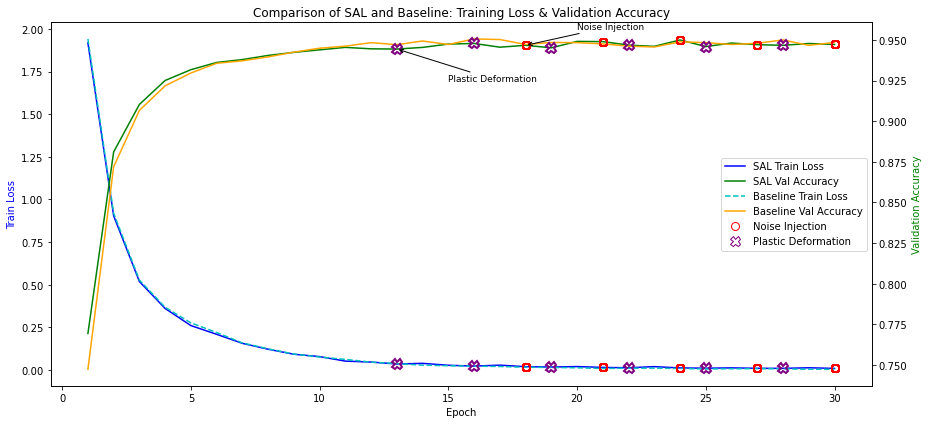

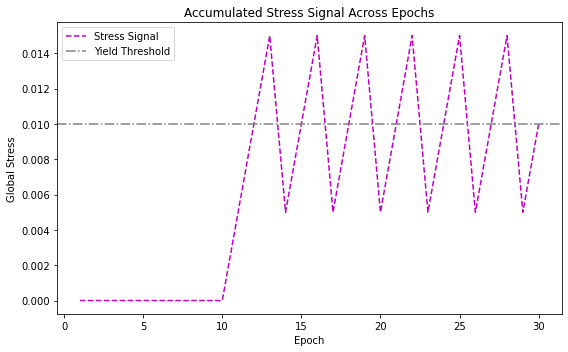

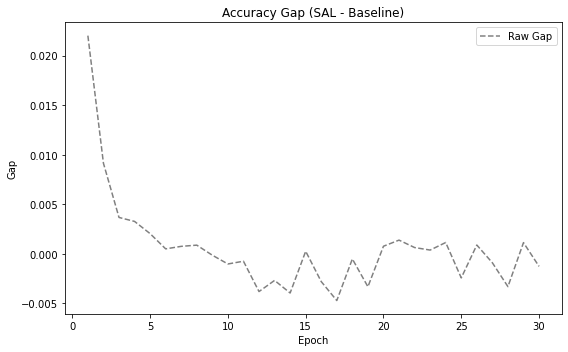

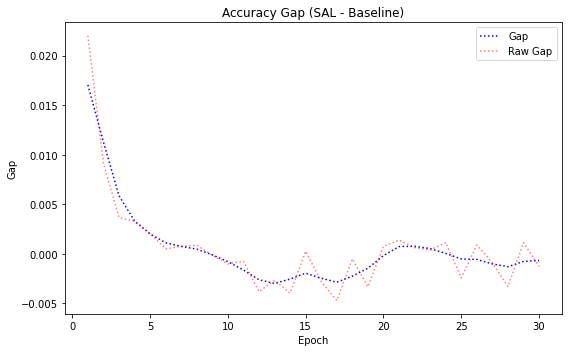

In [13]:
plot_model_performance_annotated(plastic_train_loss, plastic_val_acc, plastic_noise_epochs,
                                 baseline_train_loss, baseline_val_acc,
                                    plastic_stress_values=plastic_stress_values,
                                    plastic_deformation_epochs= plastic_deformation_epochs,
                                 smooth=False)

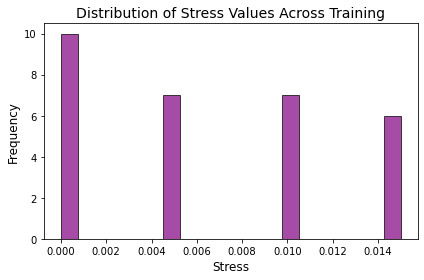

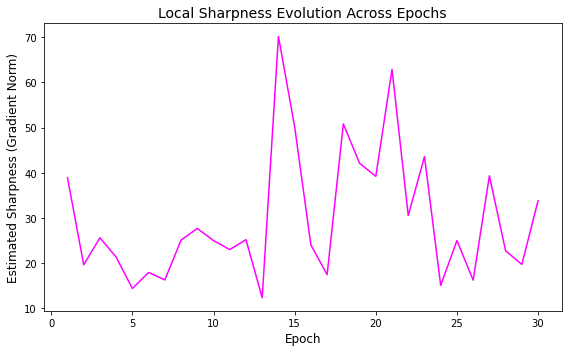

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(plastic_stress_values, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title("Distribution of Stress Values Across Training", fontsize=14)
plt.xlabel("Stress", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(plastic_sharpness)+1), plastic_sharpness, color='magenta')
plt.title("Local Sharpness Evolution Across Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Estimated Sharpness (Gradient Norm)", fontsize=12)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()




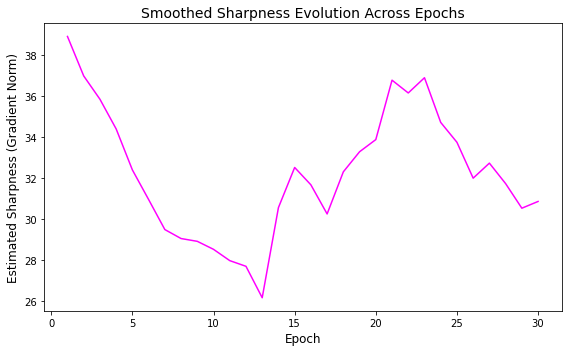

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Moving average smoothing function
def smooth_curve(points, factor=0.9):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

# Apply smoothing
smoothed_sharpness = smooth_curve(plastic_sharpness, factor=0.9)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(smoothed_sharpness) + 1), smoothed_sharpness, color='magenta')
plt.title("Smoothed Sharpness Evolution Across Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Estimated Sharpness (Gradient Norm)", fontsize=12)
plt.grid(True, axis='y', linestyle='', alpha=0.6)
plt.tight_layout()
plt.show()


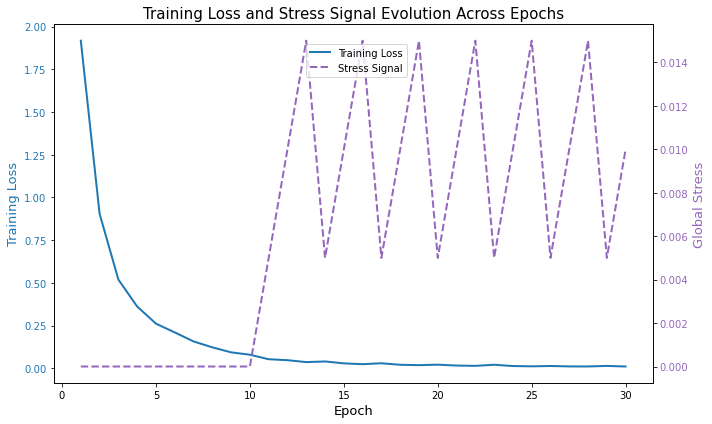

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Training Loss
color = 'tab:blue'
ax1.set_xlabel('Epoch', fontsize=13)
ax1.set_ylabel('Training Loss', color=color, fontsize=13)
ax1.plot(range(1, len(plastic_train_loss) + 1), plastic_train_loss, color=color, label='Training Loss', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='', alpha=0.7)

# Create a second y-axis for Stress
ax2 = ax1.twinx()

color = 'tab:purple'
ax2.set_ylabel('Global Stress', color=color, fontsize=13)
ax2.plot(range(1, len(plastic_stress_values) + 1), plastic_stress_values, color=color, linestyle='--', label='Stress Signal', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Titles and Legends
plt.title("Training Loss and Stress Signal Evolution Across Epochs", fontsize=15)
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,0.90))
plt.show()


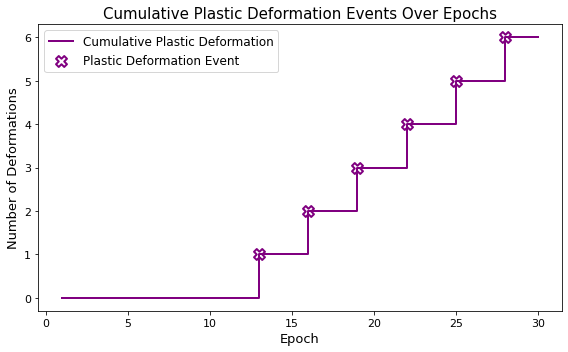

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Assuming you have plastic_stress_values and plastic_deformation_epochs already
plastic_events = np.zeros_like(plastic_stress_values)
for e in plastic_deformation_epochs:
    plastic_events[e] = 1
cumulative_plastic_events = np.cumsum(plastic_events)

plt.figure(figsize=(8, 5))

# Step plot
plt.step(
    range(1, len(cumulative_plastic_events) + 1),
    cumulative_plastic_events,
    where='post',
    color='purple',
    linewidth=2,
    label="Cumulative Plastic Deformation"
)

# Add Purple X markers at actual deformation epochs
if plastic_deformation_epochs is not None:
    plt.scatter(
        [e + 1 for e in plastic_deformation_epochs],
        [cumulative_plastic_events[e] for e in plastic_deformation_epochs],
        s=120,
        edgecolor='purple',
        facecolor='white',
        linewidth=2,
        marker='X',
        label="Plastic Deformation Event"
    )

# Formatting
plt.title("Cumulative Plastic Deformation Events Over Epochs", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Number of Deformations", fontsize=13)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Integer y-axis only
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sharpness_with_deformation(plastic_sharpness, plastic_deformation_epochs):
    epochs = range(1, len(plastic_sharpness) + 1)

    plt.figure(figsize=(10, 6))

    # Plot sharpness curve
    plt.plot(epochs, plastic_sharpness, color='magenta', label="Estimated Sharpness (Gradient Norm)", linewidth=2)

    # Mark plastic deformation epochs
    if plastic_deformation_epochs is not None:
        plt.scatter(
            [e + 1 for e in plastic_deformation_epochs],
            [plastic_sharpness[e] for e in plastic_deformation_epochs],
            s=120,
            edgecolor='purple',
            facecolor='white',
            linewidth=2,
            marker='X',
            label="Plastic Deformation"
        )

    # Formatting
    plt.title("Sharpness Evolution with Plastic Deformation Events", fontsize=15)
    plt.xlabel("Epoch", fontsize=13)
    plt.ylabel("Estimated Sharpness (Gradient Norm)", fontsize=13)
    plt.grid(True, linestyle='', alpha=0.7)
    plt.legend(fontsize=12, loc='upper right')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()


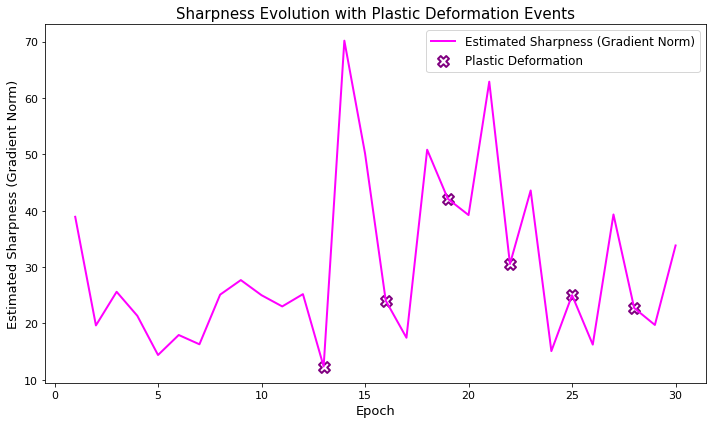

In [19]:
plot_sharpness_with_deformation(plastic_sharpness, plastic_deformation_epochs)

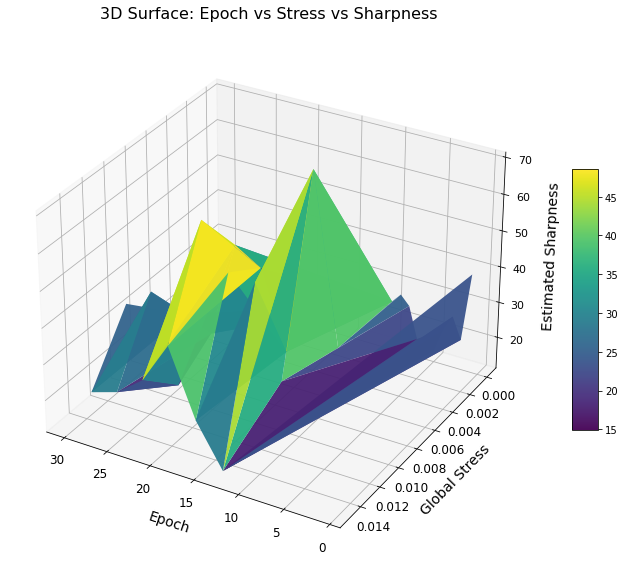

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(plastic_stress_values) + 1)
stress = np.array(plastic_stress_values)
sharpness = np.array(plastic_sharpness)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Improved trisurf
trisurf = ax.plot_trisurf(
    epochs, stress, sharpness,
    cmap='viridis',
    edgecolor='none',
    linewidth=0.2,
    antialiased=True,
    alpha=0.95
)

# Labels
ax.set_title("3D Surface: Epoch vs Stress vs Sharpness", fontsize=16, pad=20)
ax.set_xlabel("Epoch", fontsize=14, labelpad=10)
ax.set_ylabel("Global Stress", fontsize=14, labelpad=10)
ax.set_zlabel("Estimated Sharpness", fontsize=14, labelpad=10)

ax.view_init(elev=30, azim=120)  # Nice tilt
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='z', which='major', labelsize=11)

fig.colorbar(trisurf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()


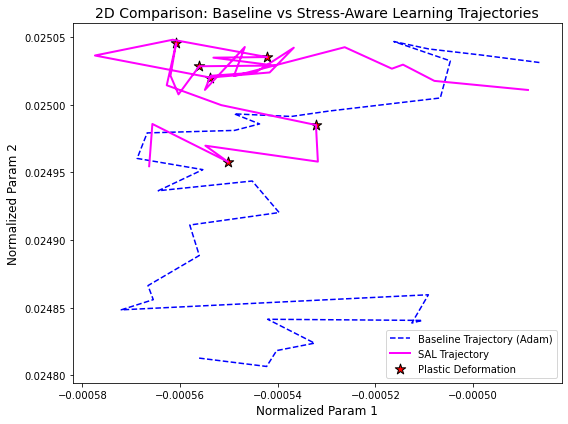

In [21]:
import matplotlib.pyplot as plt

# Separate SAL points
param1_sal = [p[0] for p in trajectory_sal]
param2_sal = [p[1] for p in trajectory_sal]

# Separate Baseline points
param1_base = [p[0] for p in baseline_trajectory]
param2_base = [p[1] for p in baseline_trajectory]

# Deformation points for SAL
deform_param1 = [trajectory_sal[i][0] for i in plastic_deformation_epochs]
deform_param2 = [trajectory_sal[i][1] for i in plastic_deformation_epochs]

# Create 2D plot
plt.figure(figsize=(8, 6))

plt.plot(param1_base, param2_base, color='blue', linestyle='--', label='Baseline Trajectory (Adam)')
plt.plot(param1_sal, param2_sal, color='magenta', linewidth=2, label='SAL Trajectory')

# Mark deformation points
plt.scatter(deform_param1, deform_param2, color='red', edgecolors='black', s=120, marker='*', label='Plastic Deformation')

plt.title("2D Comparison: Baseline vs Stress-Aware Learning Trajectories", fontsize=14)
plt.xlabel("Normalized Param 1", fontsize=12)
plt.ylabel("Normalized Param 2", fontsize=12)
plt.legend()
plt.grid(True, linestyle='', alpha=0.6)
plt.tight_layout()
plt.show()


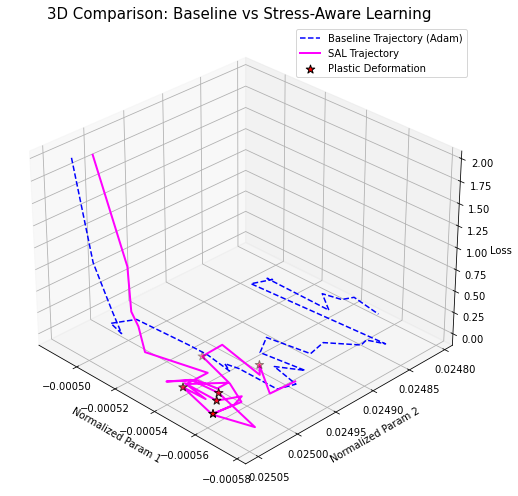

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot Baseline
ax.plot([p[0] for p in baseline_trajectory], [p[1] for p in baseline_trajectory], [p[2] for p in baseline_trajectory],
        color='blue', linestyle='--', label='Baseline Trajectory (Adam)')

# Plot SAL
ax.plot([p[0] for p in trajectory_sal], [p[1] for p in trajectory_sal], [p[2] for p in trajectory_sal],
        color='magenta', linewidth=2, label='SAL Trajectory')

# Plastic Deformation points
ax.scatter(deform_param1, deform_param2,
           [trajectory_sal[i][2] for i in plastic_deformation_epochs],
           color='red', edgecolors='black', s=80, marker='*', label='Plastic Deformation')

ax.set_title("3D Comparison: Baseline vs Stress-Aware Learning", fontsize=15)
ax.set_xlabel("Normalized Param 1")
ax.set_ylabel("Normalized Param 2")
ax.set_zlabel("Loss")
ax.view_init(elev=30, azim=135)
ax.legend()
plt.tight_layout()
plt.show()


In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Stack all flattened parameters
all_trajectories = np.vstack(trajectory_sal + baseline_trajectory)

# Fit PCA for 3D
pca = PCA(n_components=3)
pca.fit(all_trajectories)

# Transform both trajectories
sal_pca = pca.transform(np.vstack(trajectory_sal))
baseline_pca = pca.transform(np.vstack(baseline_trajectory))


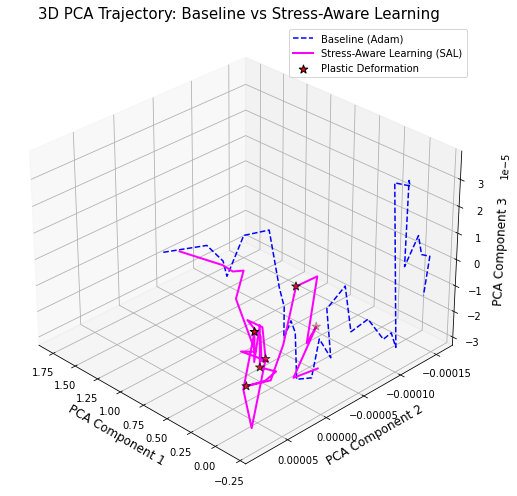

In [24]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot Baseline Trajectory
ax.plot(baseline_pca[:, 0], baseline_pca[:, 1], baseline_pca[:, 2],
        color='blue', linestyle='--', label='Baseline (Adam)')

# Plot SAL Trajectory
ax.plot(sal_pca[:, 0], sal_pca[:, 1], sal_pca[:, 2],
        color='magenta', linewidth=2, label='Stress-Aware Learning (SAL)')

# Highlight Plastic Deformation Points
ax.scatter(sal_pca[np.array(plastic_deformation_epochs), 0],
           sal_pca[np.array(plastic_deformation_epochs), 1],
           sal_pca[np.array(plastic_deformation_epochs), 2],
           color='red', edgecolors='black', s=80, marker='*', label='Plastic Deformation')

# Labels and Formatting
ax.set_title("3D PCA Trajectory: Baseline vs Stress-Aware Learning", fontsize=15)
ax.set_xlabel("PCA Component 1", fontsize=12)
ax.set_ylabel("PCA Component 2", fontsize=12)
ax.set_zlabel("PCA Component 3", fontsize=12)
ax.view_init(elev=30, azim=135)
ax.legend()
plt.tight_layout()
plt.show()



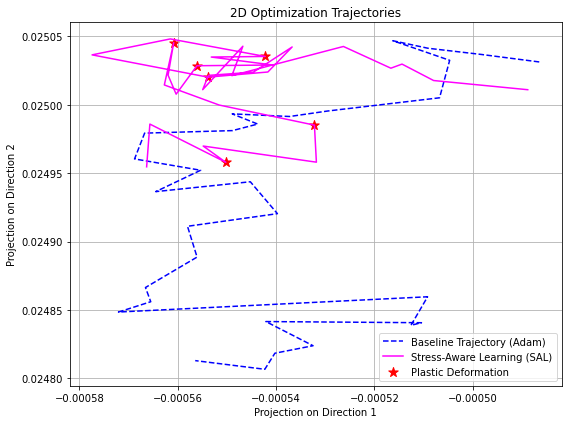

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot([p[0] for p in baseline_trajectory], [p[1] for p in baseline_trajectory],
         linestyle='--', color='blue', label='Baseline Trajectory (Adam)')
plt.plot([p[0] for p in trajectory_sal], [p[1] for p in trajectory_sal],
         color='magenta', label='Stress-Aware Learning (SAL)')
plt.scatter([trajectory_sal[i][0] for i in plastic_deformation_epochs],
            [trajectory_sal[i][1] for i in plastic_deformation_epochs],
            color='red', marker='*', s=100, label='Plastic Deformation')
plt.title("2D Optimization Trajectories")
plt.xlabel("Projection on Direction 1")
plt.ylabel("Projection on Direction 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


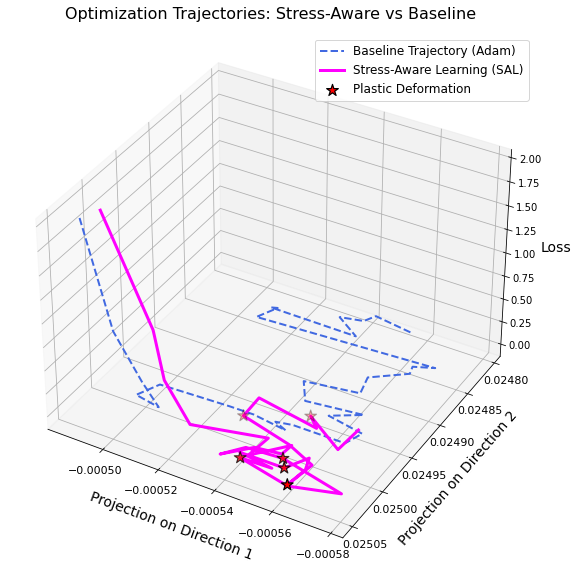

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Baseline
ax.plot([p[0] for p in baseline_trajectory], [p[1] for p in baseline_trajectory], [p[2] for p in baseline_trajectory],
        linestyle='--', color='royalblue', linewidth=2, label='Baseline Trajectory (Adam)')

# Plot SAL
ax.plot([p[0] for p in trajectory_sal], [p[1] for p in trajectory_sal], [p[2] for p in trajectory_sal],
        color='magenta', linewidth=3, label='Stress-Aware Learning (SAL)')

# Highlight Plastic Deformation points
ax.scatter([trajectory_sal[i][0] for i in plastic_deformation_epochs],
           [trajectory_sal[i][1] for i in plastic_deformation_epochs],
           [trajectory_sal[i][2] for i in plastic_deformation_epochs],
           color='red', marker='*', s=150, edgecolors='black', linewidth=1.2, label='Plastic Deformation')

# Titles and Labels
ax.set_title('Optimization Trajectories: Stress-Aware vs Baseline', fontsize=16, pad=15)
ax.set_xlabel('Projection on Direction 1', fontsize=14, labelpad=10)
ax.set_ylabel('Projection on Direction 2', fontsize=14, labelpad=10)
ax.set_zlabel('Loss', fontsize=14, labelpad=10)

# View Angle
ax.view_init(elev=35, azim=120)

# Ticks
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='z', which='major', labelsize=10)

# Legend
ax.legend(fontsize=12, loc='best')

# Grid customization
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


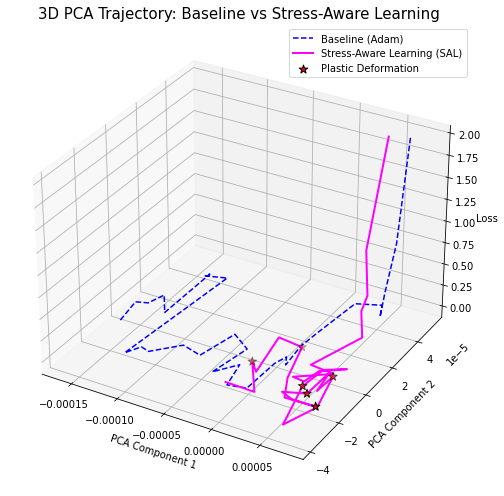

MovieWriter imagemagick unavailable; using Pillow instead.


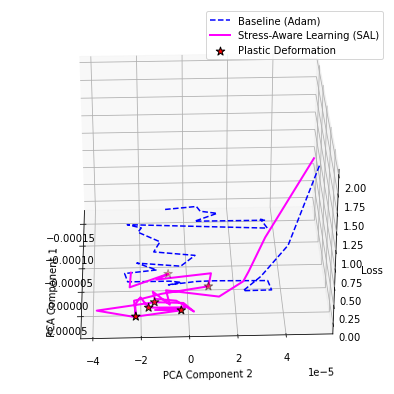

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# =============================================
# STEP 1: Prepare your data
# =============================================

baseline_array = np.array(baseline_trajectory)   # (epochs, 3)
sal_array = np.array(trajectory_sal)

baseline_array = baseline_array[:, :3]
sal_array = sal_array[:, :3]

# Stack only Param 1 and Param 2
all_points = np.vstack([baseline_array[:, :2], sal_array[:, :2]])

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_points)

# Split back
pca_baseline = pca_result[:baseline_array.shape[0]]
pca_sal = pca_result[baseline_array.shape[0]:]

# Concatenate back the Loss
pca_baseline = np.hstack([pca_baseline, baseline_array[:, [2]]])
pca_sal = np.hstack([pca_sal, sal_array[:, [2]]])

# =============================================
# STEP 2: Static Plot
# =============================================
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(pca_baseline[:, 0], pca_baseline[:, 1], pca_baseline[:, 2],
        color='blue', linestyle='--', label='Baseline (Adam)')
ax.plot(pca_sal[:, 0], pca_sal[:, 1], pca_sal[:, 2],
        color='magenta', linewidth=2, label='Stress-Aware Learning (SAL)')
ax.scatter(pca_sal[plastic_deformation_epochs, 0],
           pca_sal[plastic_deformation_epochs, 1],
           pca_sal[plastic_deformation_epochs, 2],
           color='red', edgecolors='black', s=80, marker='*', label='Plastic Deformation')

ax.set_title("3D PCA Trajectory: Baseline vs Stress-Aware Learning", fontsize=15)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("Loss")
ax.legend()
plt.tight_layout()
plt.show()

# =============================================
# STEP 3: Animation
# =============================================
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Static parts
ax.plot(pca_baseline[:, 0], pca_baseline[:, 1], pca_baseline[:, 2],
        color='blue', linestyle='--', label='Baseline (Adam)')
ax.plot(pca_sal[:, 0], pca_sal[:, 1], pca_sal[:, 2],
        color='magenta', linewidth=2, label='Stress-Aware Learning (SAL)')
ax.scatter(pca_sal[plastic_deformation_epochs, 0],
           pca_sal[plastic_deformation_epochs, 1],
           pca_sal[plastic_deformation_epochs, 2],
           color='red', edgecolors='black', s=80, marker='*', label='Plastic Deformation')

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("Loss")
ax.legend()

def rotate(angle):
    ax.view_init(elev=30, azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)

# Optional: Save
rot_animation.save('trajectory_rotation.gif', dpi=80, writer='imagemagick')

plt.show()


C:\Users\39351\AppData\Local\Temp\ipykernel_20016\4160383555.py:90: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


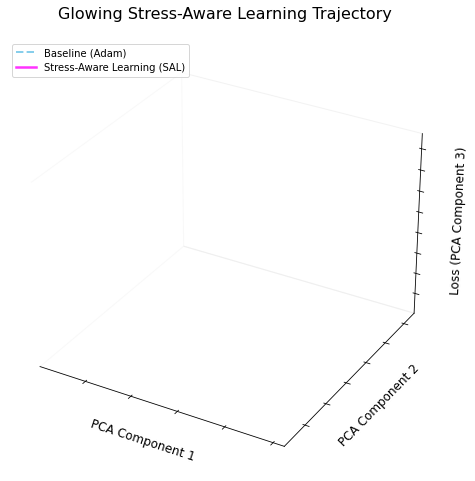

MovieWriter ffmpeg unavailable; using Pillow instead.


In [28]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA

# Assume baseline_array and sal_array are ready

# 1. Apply PCA
all_points = np.vstack([baseline_array, sal_array])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(all_points)

pca_baseline = pca_result[:baseline_array.shape[0]]
pca_sal = pca_result[baseline_array.shape[0]:]

# 2. Setup Figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
fig.patch.set_facecolor('white')

# Dynamic limits
all_x = np.concatenate([pca_baseline[:, 0], pca_sal[:, 0]])
all_y = np.concatenate([pca_baseline[:, 1], pca_sal[:, 1]])
all_z = np.concatenate([pca_baseline[:, 2], pca_sal[:, 2]])

margin_x = (np.max(all_x) - np.min(all_x)) * 0.15
margin_y = (np.max(all_y) - np.min(all_y)) * 0.15
margin_z = (np.max(all_z) - np.min(all_z)) * 0.15

ax.set_xlim(np.min(all_x) - margin_x, np.max(all_x) + margin_x)
ax.set_ylim(np.min(all_y) - margin_y, np.max(all_y) + margin_y)
ax.set_zlim(np.min(all_z) - margin_z, np.max(all_z) + margin_z)

# Clean style
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Title & Labels
ax.set_title('Glowing Stress-Aware Learning Trajectory', fontsize=16, pad=20)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('Loss (PCA Component 3)', fontsize=12)

# 3. Initialize Lines
line_baseline, = ax.plot([], [], [], color='skyblue', linestyle='--', linewidth=2, label='Baseline (Adam)')
line_sal, = ax.plot([], [], [], color='magenta', linewidth=2.5, alpha=0.8, label='Stress-Aware Learning (SAL)')

# 4. Initialize Deformation Stars
deformation_points = np.array([pca_sal[e] for e in plastic_deformation_epochs])
star_scatters = []
for _ in deformation_points:
    sc = ax.scatter([], [], [], color='gold', edgecolors='black', s=100, marker='*')
    star_scatters.append(sc)

# 5. Animation Function
def animate(i):
    line_sal.set_data(pca_sal[:i, 0], pca_sal[:i, 1])
    line_sal.set_3d_properties(pca_sal[:i, 2])

    line_baseline.set_data(pca_baseline[:i, 0], pca_baseline[:i, 1])
    line_baseline.set_3d_properties(pca_baseline[:i, 2])

    ax.view_init(elev=25, azim=(45 + i * 0.7))

    # Glow effect for SAL
    if i < len(pca_sal):
        line_sal.set_alpha(0.5 + 0.5 * (i / len(pca_sal)))

    # Stars appearing dynamically
    for idx, e in enumerate(plastic_deformation_epochs):
        if i >= e:
            star_scatters[idx]._offsets3d = ([deformation_points[idx, 0]], 
                                             [deformation_points[idx, 1]], 
                                             [deformation_points[idx, 2]])
        else:
            star_scatters[idx]._offsets3d = ([], [], [])

# 6. Create Animation
ani = animation.FuncAnimation(fig, animate, frames=len(pca_sal), interval=100, blit=False)

# 7. Legend
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Optional Save
ani.save('stress_aware_learning_dynamic.gif', fps=20, dpi=150)


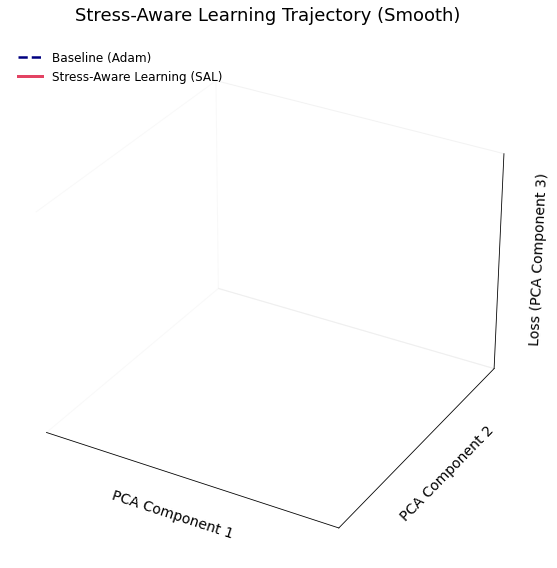

MovieWriter ffmpeg unavailable; using Pillow instead.


In [29]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import make_interp_spline
from sklearn.decomposition import PCA

# Assume baseline_array and sal_array and plastic_deformation_epochs are ready

# 1. Apply PCA
all_points = np.vstack([baseline_array, sal_array])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(all_points)

pca_baseline = pca_result[:baseline_array.shape[0]]
pca_sal = pca_result[baseline_array.shape[0]:]

# 2. Spline interpolation to smooth trajectories
def smooth_curve(XYZ_array, smooth_factor=5):
    epochs = np.arange(XYZ_array.shape[0])
    spline_epochs = np.linspace(0, epochs[-1], XYZ_array.shape[0] * smooth_factor)
    
    spline_x = make_interp_spline(epochs, XYZ_array[:, 0])(spline_epochs)
    spline_y = make_interp_spline(epochs, XYZ_array[:, 1])(spline_epochs)
    spline_z = make_interp_spline(epochs, XYZ_array[:, 2])(spline_epochs)
    
    return np.vstack([spline_x, spline_y, spline_z]).T

# Smooth the trajectories
smooth_baseline = smooth_curve(pca_baseline, smooth_factor=5)
smooth_sal = smooth_curve(pca_sal, smooth_factor=5)

# 3. Setup Figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
fig.patch.set_facecolor('white')

# Axis limits
all_x = np.concatenate([smooth_baseline[:, 0], smooth_sal[:, 0]])
all_y = np.concatenate([smooth_baseline[:, 1], smooth_sal[:, 1]])
all_z = np.concatenate([smooth_baseline[:, 2], smooth_sal[:, 2]])

margin_x = (np.max(all_x) - np.min(all_x)) * 0.15
margin_y = (np.max(all_y) - np.min(all_y)) * 0.15
margin_z = (np.max(all_z) - np.min(all_z)) * 0.15

ax.set_xlim(np.min(all_x) - margin_x, np.max(all_x) + margin_x)
ax.set_ylim(np.min(all_y) - margin_y, np.max(all_y) + margin_y)
ax.set_zlim(np.min(all_z) - margin_z, np.max(all_z) + margin_z)

# Style
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Titles
ax.set_title('Stress-Aware Learning Trajectory (Smooth)', fontsize=18, color='black', pad=20)
ax.set_xlabel('PCA Component 1', fontsize=14, color='black')
ax.set_ylabel('PCA Component 2', fontsize=14, color='black')
ax.set_zlabel('Loss (PCA Component 3)', fontsize=14, color='black')

# 4. Initialize Lines
line_baseline, = ax.plot([], [], [], color='navy', linestyle='--', linewidth=2.5, label='Baseline (Adam)')
line_sal, = ax.plot([], [], [], color='crimson', linewidth=3, alpha=0.8, label='Stress-Aware Learning (SAL)')

# 5. Initialize Stars
deformation_points = np.array([pca_sal[e] for e in plastic_deformation_epochs])
star_scatters = []
for _ in deformation_points:
    sc = ax.scatter([], [], [], color='darkorange', edgecolors='black', s=100, marker='*')
    star_scatters.append(sc)

# 6. Animation Function
def animate(i):
    line_sal.set_data(smooth_sal[:i, 0], smooth_sal[:i, 1])
    line_sal.set_3d_properties(smooth_sal[:i, 2])

    line_baseline.set_data(smooth_baseline[:i, 0], smooth_baseline[:i, 1])
    line_baseline.set_3d_properties(smooth_baseline[:i, 2])

    ax.view_init(elev=25, azim=(45 + i * 0.7))

    # Glow effect
    if i < len(smooth_sal):
        line_sal.set_alpha(0.5 + 0.5 * (i / len(smooth_sal)))

    # Star appearance
    for idx, e in enumerate(plastic_deformation_epochs):
        # rescale deformation epochs to smooth curve (factor 5)
        e_smooth = e * 5
        if i >= e_smooth:
            star_scatters[idx]._offsets3d = ([deformation_points[idx, 0]], 
                                             [deformation_points[idx, 1]], 
                                             [deformation_points[idx, 2]])
        else:
            star_scatters[idx]._offsets3d = ([], [], [])

# 7. Create Animation
ani = animation.FuncAnimation(fig, animate, frames=len(smooth_sal), interval=50, blit=False)

# 8. Legend
ax.legend(loc='upper left', fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

# 9. Optional Save
ani.save('stress_aware_learning_smooth.gif', fps=20, dpi=150)



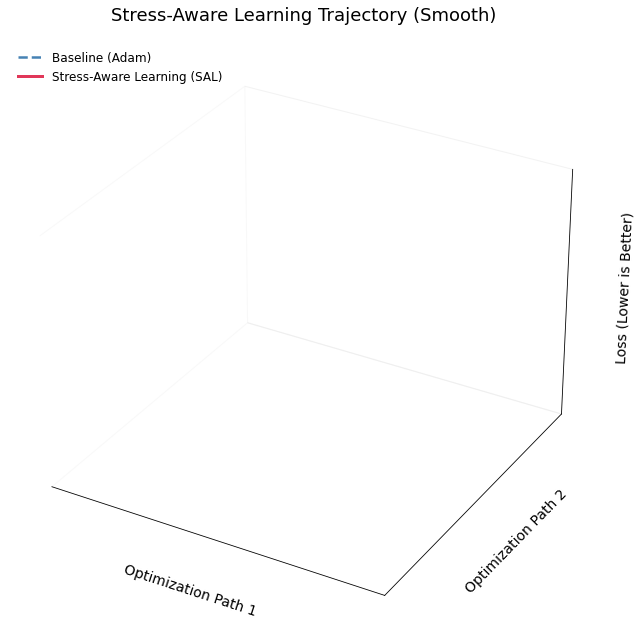

MovieWriter ffmpeg unavailable; using Pillow instead.


In [30]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import make_interp_spline
from sklearn.decomposition import PCA

# Assume baseline_array, sal_array, plastic_deformation_epochs ready

# 1. Apply PCA
all_points = np.vstack([baseline_array, sal_array])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(all_points)

pca_baseline = pca_result[:baseline_array.shape[0]]
pca_sal = pca_result[baseline_array.shape[0]:]

# 2. Spline interpolation to smooth trajectories
def smooth_curve(XYZ_array, smooth_factor=5):
    epochs = np.arange(XYZ_array.shape[0])
    spline_epochs = np.linspace(0, epochs[-1], XYZ_array.shape[0] * smooth_factor)
    spline_x = make_interp_spline(epochs, XYZ_array[:, 0])(spline_epochs)
    spline_y = make_interp_spline(epochs, XYZ_array[:, 1])(spline_epochs)
    spline_z = make_interp_spline(epochs, XYZ_array[:, 2])(spline_epochs)
    return np.vstack([spline_x, spline_y, spline_z]).T

smooth_baseline = smooth_curve(pca_baseline, smooth_factor=5)
smooth_sal = smooth_curve(pca_sal, smooth_factor=5)

# 3. Setup Figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
fig.patch.set_facecolor('white')

# Axis limits
all_x = np.concatenate([smooth_baseline[:, 0], smooth_sal[:, 0]])
all_y = np.concatenate([smooth_baseline[:, 1], smooth_sal[:, 1]])
all_z = np.concatenate([smooth_baseline[:, 2], smooth_sal[:, 2]])

margin_x = (np.max(all_x) - np.min(all_x)) * 0.15
margin_y = (np.max(all_y) - np.min(all_y)) * 0.15
margin_z = (np.max(all_z) - np.min(all_z)) * 0.15

ax.set_xlim(np.min(all_x) - margin_x, np.max(all_x) + margin_x)
ax.set_ylim(np.min(all_y) - margin_y, np.max(all_y) + margin_y)
ax.set_zlim(np.min(all_z) - margin_z, np.max(all_z) + margin_z)

# Invert Z axis to show that lower loss is better
ax.invert_zaxis()

# Style
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# 4. Titles and Axis Labels
ax.set_title('Stress-Aware Learning Trajectory (Smooth)', fontsize=18, color='black', pad=20)
ax.set_xlabel('Optimization Path 1', fontsize=14, color='black', labelpad=15)
ax.set_ylabel('Optimization Path 2', fontsize=14, color='black', labelpad=15)
ax.set_zlabel('Loss (Lower is Better)', fontsize=14, color='black', labelpad=15)

# 5. Initialize Lines
line_baseline, = ax.plot([], [], [], color='steelblue', linestyle='--', linewidth=2.5, label='Baseline (Adam)')
line_sal, = ax.plot([], [], [], color='crimson', linewidth=3, alpha=0.85, label='Stress-Aware Learning (SAL)')

# 6. Initialize Deformation Stars
deformation_points = np.array([pca_sal[e] for e in plastic_deformation_epochs])
star_scatters = []
for _ in deformation_points:
    sc = ax.scatter([], [], [], color='gold', edgecolors='black', s=100, marker='*')
    star_scatters.append(sc)

# 7. Animation Function
def animate(i):
    line_sal.set_data(smooth_sal[:i, 0], smooth_sal[:i, 1])
    line_sal.set_3d_properties(smooth_sal[:i, 2])

    line_baseline.set_data(smooth_baseline[:i, 0], smooth_baseline[:i, 1])
    line_baseline.set_3d_properties(smooth_baseline[:i, 2])

    ax.view_init(elev=25, azim=(45 + i * 0.7))

    if i < len(smooth_sal):
        line_sal.set_alpha(0.5 + 0.5 * (i / len(smooth_sal)))

    for idx, e in enumerate(plastic_deformation_epochs):
        e_smooth = e * 5
        if i >= e_smooth:
            star_scatters[idx]._offsets3d = ([deformation_points[idx, 0]],
                                             [deformation_points[idx, 1]],
                                             [deformation_points[idx, 2]])
        else:
            star_scatters[idx]._offsets3d = ([], [], [])

# 8. Create Animation
ani = animation.FuncAnimation(fig, animate, frames=len(smooth_sal), interval=50, blit=False)

# 9. Legend
ax.legend(loc='upper left', fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

# 10. Optional Save
ani.save('stress_aware_learning_smooth_lossaxis.gif', fps=20, dpi=150)


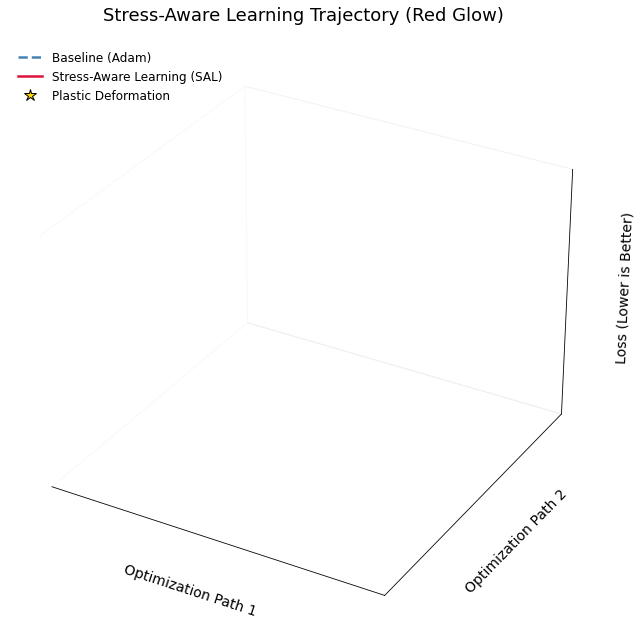

MovieWriter ffmpeg unavailable; using Pillow instead.


In [31]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import make_interp_spline
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Assume baseline_array, sal_array, plastic_deformation_epochs are ready

# 1. Apply PCA
all_points = np.vstack([baseline_array, sal_array])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(all_points)

pca_baseline = pca_result[:baseline_array.shape[0]]
pca_sal = pca_result[baseline_array.shape[0]:]

# 2. Spline interpolation to smooth trajectories
def smooth_curve(XYZ_array, smooth_factor=5):
    epochs = np.arange(XYZ_array.shape[0])
    spline_epochs = np.linspace(0, epochs[-1], XYZ_array.shape[0] * smooth_factor)
    spline_x = make_interp_spline(epochs, XYZ_array[:, 0])(spline_epochs)
    spline_y = make_interp_spline(epochs, XYZ_array[:, 1])(spline_epochs)
    spline_z = make_interp_spline(epochs, XYZ_array[:, 2])(spline_epochs)
    return np.vstack([spline_x, spline_y, spline_z]).T

smooth_baseline = smooth_curve(pca_baseline, smooth_factor=5)
smooth_sal = smooth_curve(pca_sal, smooth_factor=5)

# 3. Generate red color array for SAL (dynamic transparency)
colors_sal = np.array([[1.0, 0.0, 0.0, alpha] for alpha in np.linspace(0.2, 1.0, smooth_sal.shape[0])])

# 4. Setup Figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
fig.patch.set_facecolor('white')

# Axis limits
all_x = np.concatenate([smooth_baseline[:, 0], smooth_sal[:, 0]])
all_y = np.concatenate([smooth_baseline[:, 1], smooth_sal[:, 1]])
all_z = np.concatenate([smooth_baseline[:, 2], smooth_sal[:, 2]])

margin_x = (np.max(all_x) - np.min(all_x)) * 0.15
margin_y = (np.max(all_y) - np.min(all_y)) * 0.15
margin_z = (np.max(all_z) - np.min(all_z)) * 0.15

ax.set_xlim(np.min(all_x) - margin_x, np.max(all_x) + margin_x)
ax.set_ylim(np.min(all_y) - margin_y, np.max(all_y) + margin_y)
ax.set_zlim(np.min(all_z) - margin_z, np.max(all_z) + margin_z)

# Invert Z axis
ax.invert_zaxis()

# Style
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Titles
ax.set_title('Stress-Aware Learning Trajectory (Red Glow)', fontsize=18, color='black', pad=20)
ax.set_xlabel('Optimization Path 1', fontsize=14, color='black', labelpad=15)
ax.set_ylabel('Optimization Path 2', fontsize=14, color='black', labelpad=15)
ax.set_zlabel('Loss (Lower is Better)', fontsize=14, color='black', labelpad=15)

# Initialize Baseline Line
line_baseline, = ax.plot([], [], [], color='steelblue', linestyle='--', linewidth=2.5, label='Baseline (Adam)')

# Initialize SAL dynamic scatter
sc_sal = ax.scatter([], [], [], color=[], s=6)

# Plastic Deformation Stars
deformation_points = np.array([pca_sal[e] for e in plastic_deformation_epochs])
star_scatters = []
for _ in deformation_points:
    sc = ax.scatter([], [], [], color='gold', edgecolors='black', s=100, marker='*')
    star_scatters.append(sc)

# 5. Animation Function
def animate(i):
    # Update baseline
    line_baseline.set_data(smooth_baseline[:i, 0], smooth_baseline[:i, 1])
    line_baseline.set_3d_properties(smooth_baseline[:i, 2])

    # Update SAL scatter
    sc_sal._offsets3d = (smooth_sal[:i, 0], smooth_sal[:i, 1], smooth_sal[:i, 2])
    sc_sal.set_color(colors_sal[:i])

    ax.view_init(elev=25, azim=(45 + i * 0.7))

    # Dynamic Plastic Deformation Stars
    for idx, e in enumerate(plastic_deformation_epochs):
        e_smooth = e * 5  # because of smoothing factor
        if i >= e_smooth:
            star_scatters[idx]._offsets3d = ([deformation_points[idx, 0]],
                                             [deformation_points[idx, 1]],
                                             [deformation_points[idx, 2]])
        else:
            star_scatters[idx]._offsets3d = ([], [], [])

# 6. Create Animation
ani = animation.FuncAnimation(fig, animate, frames=len(smooth_sal), interval=50, blit=False)

# 7. Custom Legend
legend_elements = [
    Line2D([0], [0], color='steelblue', lw=2.5, linestyle='--', label='Baseline (Adam)'),
    Line2D([0], [0], color='crimson', lw=2.5, linestyle='-', label='Stress-Aware Learning (SAL)'),
    Line2D([0], [0], marker='*', color='gold', markeredgecolor='black', markersize=12, linestyle='None', label='Plastic Deformation')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, frameon=False)

# 8. Final layout
plt.tight_layout()
plt.show()

# 9. Save if you want
ani.save('stress_aware_learning_red_glow.gif', fps=20, dpi=150)


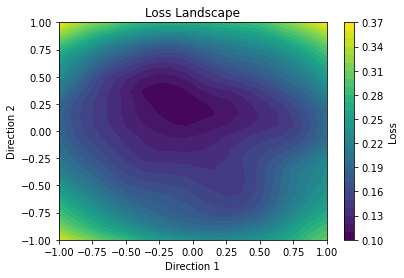

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def get_random_direction(model):
    return [tf.random.normal(shape=w.shape) / (tf.norm(tf.random.normal(shape=w.shape)) + 1e-10)
            for w in model.trainable_variables]

@tf.function
def compute_batch_loss(model, x_batch, y_batch, loss_fn):
    preds = model(x_batch, training=False)
    return loss_fn(y_batch, preds)

def loss_landscape_fast(model, loss_fn, dataset, alphas, beta=1.0, max_batches=3):
    original_weights = [tf.identity(w) for w in model.trainable_variables]

    dir1 = get_random_direction(model)
    dir2 = get_random_direction(model)

    losses = np.zeros((len(alphas), len(alphas)))

    # Preload limited dataset subset for speed
    subset_data = []
    for i, (x, y) in enumerate(dataset):
        subset_data.append((x, y))
        if i + 1 >= max_batches:
            break

    for i, a1 in enumerate(alphas):
        for j, a2 in enumerate(alphas):
            # Reset weights
            for var, orig in zip(model.trainable_variables, original_weights):
                var.assign(orig)

            # Apply perturbation
            for var, d1, d2 in zip(model.trainable_variables, dir1, dir2):
                var.assign_add(beta * (a1 * d1 + a2 * d2))

            # Compute average loss on subset
            total_loss = 0.0
            for x_batch, y_batch in subset_data:
                total_loss += compute_batch_loss(model, x_batch, y_batch, loss_fn)
            avg_loss = total_loss / len(subset_data)
            losses[i, j] = avg_loss.numpy()

    # Restore original weights
    for var, orig in zip(model.trainable_variables, original_weights):
        var.assign(orig)

    return losses

alphas = np.linspace(-1.0, 1.0, 20)
losses = loss_landscape_fast(plastic_model, loss_fn, test_dataset, alphas, beta=0.05)

X, Y = np.meshgrid(alphas, alphas)
plt.contourf(X, Y, losses, levels=30, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
plt.title('Loss Landscape')
plt.show()


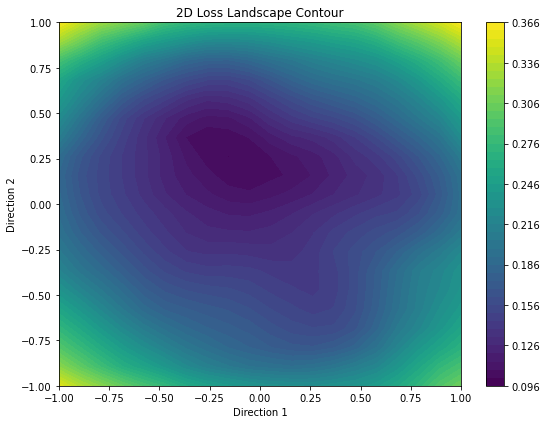

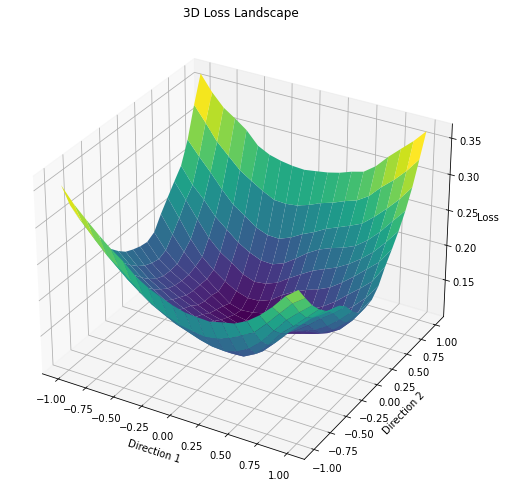

In [33]:
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, losses, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title("2D Loss Landscape Contour")
plt.xlabel("Direction 1")
plt.ylabel("Direction 2")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, losses, cmap='viridis', edgecolor='none')
ax.set_title("3D Loss Landscape")
ax.set_xlabel("Direction 1")
ax.set_ylabel("Direction 2")
ax.set_zlabel("Loss")
plt.tight_layout()
plt.show()


In [34]:
# ============================================================
# Extended Evaluation Metrics: Classification Report + Inference Time
# ============================================================
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Initialize lists to collect data
x_test_list = []
y_test_list = []

# Unbatch the dataset and convert to NumPy
for images, labels in val_data.unbatch():
    x_test_list.append(images.numpy())
    y_test_list.append(labels.numpy())

# Stack into arrays
x_test = np.stack(x_test_list)
y_test = np.stack(y_test_list)

print("✅ x_test shape:", x_test.shape)
print("✅ y_test shape:", y_test.shape)

# Safely resize in batches (for 128x128 MobileNetV2 input)
def resize_dataset(images, new_size=(96, 96), batch_size=100):
    resized = []
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]
        resized_batch = tf.image.resize(batch, new_size).numpy()
        resized.append(resized_batch)
    return np.concatenate(resized, axis=0)

# Resize test images
x_test_resized = resize_dataset(x_test, new_size=(64, 64))

# Convert one-hot labels to integers
y_true = np.argmax(y_test, axis=1)

# Predict in batches (to avoid GPU memory error)
def batched_predict(model, x_data, batch_size=64):
    preds = []
    for i in range(0, len(x_data), batch_size):
        batch = x_data[i:i+batch_size]
        preds.append(model.predict(batch))
    return np.concatenate(preds, axis=0)

# Predictions
baseline_preds = batched_predict(baseline_model, x_test_resized)
plastic_preds  = batched_predict(plastic_model, x_test_resized)

baseline_labels = np.argmax(baseline_preds, axis=1)
plastic_labels  = np.argmax(plastic_preds, axis=1)

# === Classification Reports ===
print("\n=== Classification Report: Baseline Model ===")
print(classification_report(y_true, baseline_labels, digits=4))

print("\n=== Classification Report: Plastic Model ===")
print(classification_report(y_true, plastic_labels, digits=4))

# === Confusion Matrices ===
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true, baseline_labels), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true, plastic_labels), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Plastic Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# === Inference Time ===
def measure_inference_time(model, x_sample, n_runs=100):
    times = []
    for _ in range(n_runs):
        start = time.time()
        _ = model.predict(np.expand_dims(x_sample, axis=0))
        times.append(time.time() - start)
    return np.mean(times)

sample = x_test_resized[0]
baseline_infer_time = measure_inference_time(baseline_model, sample)
plastic_infer_time  = measure_inference_time(plastic_model, sample)

print(f"\n⏱️ Inference Time per Image:")
print(f"Baseline Model: {baseline_infer_time * 1000:.2f} ms")
print(f"Plastic Model:  {plastic_infer_time * 1000:.2f} ms")

✅ x_test shape: (3925, 96, 96, 3)
✅ y_test shape: (3925, 10)


ValueError: in user code:

    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\39351\anaconda3\envs\TFgpuKeras\lib\site-packages\keras\engine\input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 96, 96, 3), found shape=(32, 64, 64, 3)
